<a href="https://colab.research.google.com/github/Tharun1525/2303A51525/blob/main/ass_3_2303A51525_b_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
numerical_cols = data.select_dtypes(include=['float64', 'int64'])

In [6]:
print("\nStatistics:")
print("Mean:")
print(numerical_cols.mean())


Statistics:
Mean:
Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64


In [7]:
normalized_data = (numerical_cols - numerical_cols.min()) / (numerical_cols.max() - numerical_cols.min())
print("\nNormalized Data (First 5 rows):")
print(normalized_data.head())


Normalized Data (First 5 rows):
         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0  0.000000       0.222222      0.625000       0.067797      0.041667
1  0.006711       0.166667      0.416667       0.067797      0.041667
2  0.013423       0.111111      0.500000       0.050847      0.041667
3  0.020134       0.083333      0.458333       0.084746      0.041667
4  0.026846       0.194444      0.666667       0.067797      0.041667


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
features=data.drop(columns=['Id','Species'])

In [10]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

In [11]:
pca=PCA(n_components=2)
pca_features=pca.fit_transform(scaled_features)

In [ ]:
pca_data=pd.DataFrame(data=pca_features,columns=['PC1','PC2'])
pca_data['Species']=data['Species']

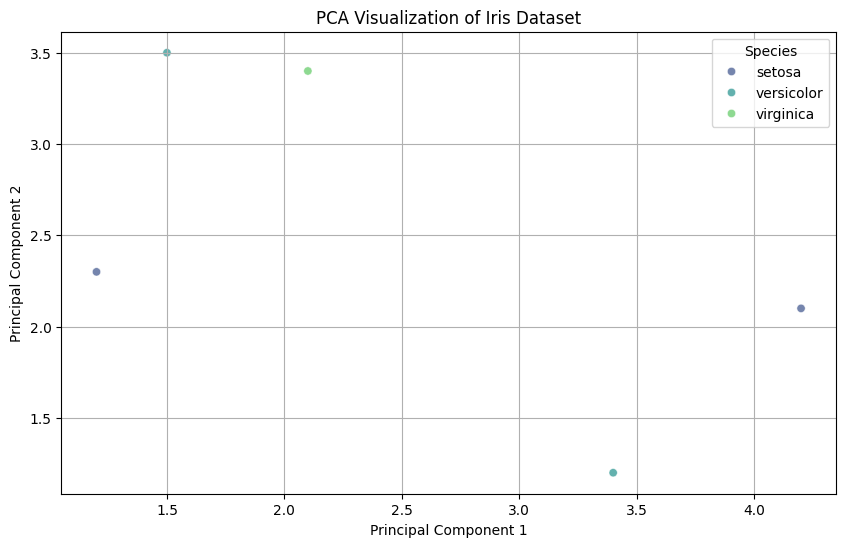

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1',y='PC2',hue='Species',data=pca_data,palette='viridis',alpha=0.7)
plt.title('PCA Visualization of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.grid(True)
plt.show()